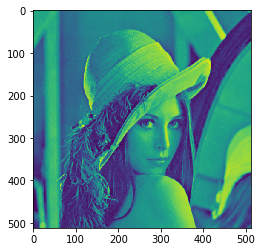

In [1]:
from matplotlib import pyplot as plt
from IPython.display import Image
import numpy as np
import pywt
import cv2
import math
import time

img = cv2.imread("Figures/Lenna.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(1)
plt.imshow(img)
plt.show()



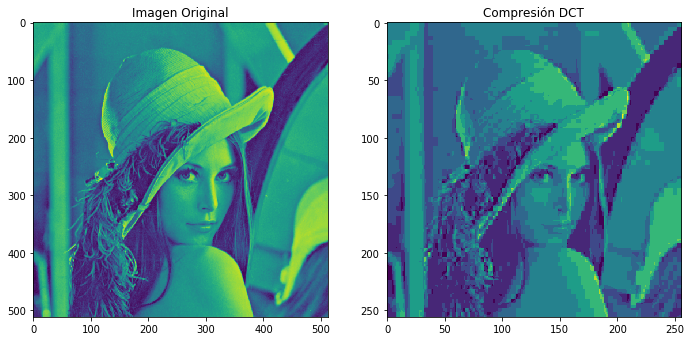

Tiempo de ejecución =  0.09216594696044922


In [2]:
def JPEG(img):
    
    qMtx = np.matrix('16 11 10 16 24 40 51 61;\
                      12 12 14 19 26 58 60 55;\
                      14 13 16 24 40 57 69 56;\
                      14 17 22 29 51 87 80 62;\
                      18 22 37 56 68 109 103 77;\
                      24 35 55 64 81 104 103 92;\
                      49 64 78 77 103 121 120 101;\
                      72 92 95 98 112 100 103 99').astype('float32')
    n = len(qMtx)    
    h = img.shape[0]
    w = img.shape[1]
    
    nc = int(len(qMtx)/2)
    hc = math.floor(h/2)
    wc = math.floor(w/2)
    
    cmpImage = np.zeros((hc, wc), np.uint8)  
    for i in range(0, math.floor(h/n)):
        for j in range(0, math.floor(w/n)):
            sample = img[i*n:i*n+8,j*n:j*n+8]
            imf = np.float32(sample)/255.0
            dct = cv2.dct(imf)
            qDct = (dct*127/qMtx).astype(int)
            #print(qDct)
            idct = cv2.idct(np.float32(qDct)/255.0) 
            cmpImage[i*nc:i*nc+4,j*nc:j*nc+4] = (idct[0:4,0:4]*255).astype(int)
    return cmpImage

start = time.time()
cmp = JPEG(img)
end = time.time()
dctTime = end - start

plt.figure(1)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(121) , plt.imshow(img)
plt.title('Imagen Original')
plt.subplot(122) , plt.imshow(cmp)
plt.title('Compresión DCT')
plt.show()

print('Tiempo de ejecución = ', dctTime)





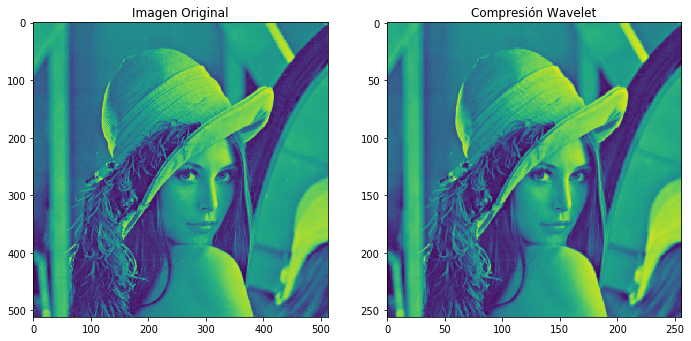

Tiempo de ejecución =  0.008662939071655273


In [3]:
def w2d(img, mode='haar', level=1):    
    coeffs=pywt.wavedec2(img, mode, level=level)
    return coeffs[0]

dwtImg = w2d(img)

start = time.time()
dwtImg = w2d(img)
end = time.time()
dwtTime = end - start

plt.figure(1)
plt.subplots_adjust(left=0.0, right=1.5, bottom=0.0, top=1.5)
plt.subplot(121) , plt.imshow(img)
plt.title('Imagen Original')
plt.subplot(122) , plt.imshow(dwtImg)
plt.title('Compresión Wavelet')
plt.show()

print('Tiempo de ejecución = ', dwtTime)